### Imports

In [ ]:
import ipywidgets as wg
from IPython.display import display, HTML
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last_expr"
# display(HTML("<style>.container { width:70% !important; }</style>"))

import pandas as pd
import numpy as np
import scipy

import sys, os
import time
import datetime
import re

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# `README`

This is a notebook with example [Plotly](https://plotly.com/python/) and [IPyWidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) code. Most of it was taken from the respective websites' documentation pages; some of it was written by me.

**`widgets`** are python objects that can be visually represented in the notebook, e.g. sliders, textboxes or dropdowns. They can be used to build interactive GUIs.

**`plotly`** is a library for producing interactive graphs. It also matches all the features of a conventional library like matplotlib, and (in my opinion) can be a lot more intuitive to use. There are 2 main ways to create graphs in plotly: using **`plotly graph objects`** (imported as **`go`**, this is more low-level, and gives you more control over the graph) and **`plotly express`** (imported as **`px`**, this is useful for easily producing nice-looking graphs with very little code).

Plotly and widgets can be combined to create interactive output that you control the appearance of (e.g. using dropdowns to select different groups of data to show on a graph).

<hr style="border:2px solid gray"> </hr>

### The purpose of this guide

This guide has two main purposes. 

The first is to provide a condensed summary of what I see as the most useful parts of both libaries, without having to scroll through endless tutorials and documentation pages.

The second is to provide a useful resource to find code which produces the plot / widget you want. 

I'd recommend this Jupyter Notebook mainly for the first purpose; if you're using it for the second purpose then you might find the Streamlit site more useful.

<hr style="border:2px solid gray"> </hr>

### How to read this

You might have noticed that this notebook is pretty long! For that reason, I'd recommend installing the Jupyter extension `collapsible headings`. That way, you'll be able to navigate the notebook more easily, by using the dropdown headings:

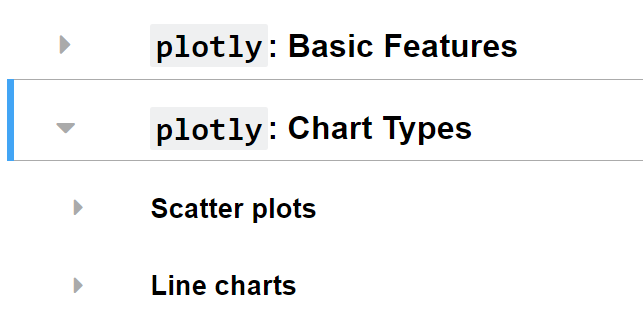

You can run the notebook to generate all output by pressing `Cell` -> `Run All` in the top menu. Note that you might have to install some libraries (all the libraries you'll need are imported in the first cell of this notebook).

<hr style="border:2px solid gray"> </hr>

### Contents

* **`plotly`**
    * **Introduction** — describes what Plotly is in more detail, and goes over the core Plotly syntax
    * **Basic Features** — shows how to add features like legend, titles, error bars and hover text to graphs
    * **Chart Cypes** — showcases a variety of different plotly charts (e.g. line, scatter, heatmap)
* **`widgets`**
    * **Introduction** — gives an overview of what widgets are, goes over the core syntax for widgets
    * **Widget Types** — showcases most available widgets
    * **Layout** — shows how to display widgets together, and give them a nice layout
    * **Output, Interactions & Events** — shows how to use widgets in other functions' input and output
* **`plotly & widgets`** — showcases a few examples of widgets being used as a GUI to interact with plotly graphs

<hr style="border:2px solid gray"> </hr>

If you find this guide useful, I'd love to know (and also if you create any cool graphs that you think could be added to this notebook, please send them!).

Happy plotting!

<hr style="border:2px solid gray"> </hr>

# `plotly`: Introduction

## Why `plotly`?

Learning a new library's syntax is hard and time-consuming, especially so for plotting libraries (since there are so many different things you might want to plot). Many people reading this are probably already familiar with `matplotlib`, and might be wondering why they would want to switch. Here, I sketch out a few reasons why I made the jump, and consider Plotly to be superior to matplotlib. I'll elaborate on each of these later on.

## The plots are interactive

This is the big one. Matplotlib does make interactive plots, but they aren't nearly as big a feature for that programming langauge. In contrast, all of Plotly's graphs are interactive by default. You can zoom in on particular chunks of data, hover over it to see values, etc. This is a massive help when you're trying to make sense of data, whether that means examining the activations of neurons in a transformer, or examining in detail a certain trading pattern from a week in 2019.

Below is just one example of a powerful interactive graph which you can create with a very small amount of code. You can try hovering over datapoints to see extra information, or clicking and dragging to zoom in on a section of the graph (and double clicking to reset the axes).

In [ ]:
df = px.data.gapminder().query("year==2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)

fig.show()

This is in my view the biggest advantage that Plotly offers.

## Intuitive functions and parameters

I personally found matplotlib quite hard to learn, because the functions and params and the ways they were used never seemed intuitive for me. Plotly always seemed more straightforward. To summarise how the core parts of it work:

> You first define a figure. This can either be from plotly express (e.g. `px.scatter`) or from plotly graph objects (e.g. `go.Figure(data=go.Scatter)`). `px` generally requires less code, while `go` requires more code but gives you more low-level control. Both `px` and `go` will accept data in the form of lists or arrays, but if you use `px` then you have the added option of passing in data as a dataframe, and having the other arguments refer to column names of that dataframe.

> You can then update the figure by calling the method `update_traces` (to change the data) or `update_layout` (to change the appearance). Most parameters are accessed via nested dictionaries, e.g. you would pass `title = dict(text="My Title")` into the update layout function to change the title. This can also be abbreviated to `title_text="My Title` (this is called magic underscore notation in Plotly).

The documentation pages for Plotly are also really good, and you can find basically any kind of graph you want there.

## Integration with IPython widgets

Widgets are interactive ways to control certain values in Python (e.g. sliders, or dropdown menus). These can be easily combined with Plotly using the `go.FigureWidget` wrapper to create graphs which change in response to the widgets' values. This is another great way to explore your data in more detail.

---

I expect matplotlib to still be the best tool for some tasks, and it might be that learning a new graphing library doesn't appeal to you. But before you reject the idea, I'd encourage you to look through some of the other sections of this course, and give it a try!

## The `Figure` object

The core object in Plotly is the Figure object, which is pretty similar to the Figure object in matplotlib. It has quite a few attributes, but the most important ones are **`data`** and **`layout`**.

* **`data`** contains the actual data of the figure, in the form of a list of **`traces`**. A trace is a single set of related graphical marks in a figure. For instance, the plot below has three traces, corresponding to the three groups of differently-formatted points.

* **`layout`** contains the top-level attributes of the figure, such as dimensions, margins, titles and axes.

### Creating and Displaying Figures

The low-level way to create figures in plotly is by using **`plotly.graph_objects`**. 

You can display figures in your notebook by using **`fig.show()`**.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(height=400, width=600)
)
fig.show()

In [ ]:
fig.data

In [ ]:
fig.layout

Here we can see that `data` is stored as a tuple of traces (in this case just one), and `layout` is stored as a single object. We can extract a specific value either as an attribute, or by treating it as a dictionary. Many properties of graphs can be accessed and initialised as nested dictionaries.

In [ ]:
fig.data[0].x

In [ ]:
fig.layout["height"]



### Updating Figures

Graphs can be updated by using the methods **`update_traces`** (for the data) and **`update_layout`** (for the layout). An example is shown below.

In [ ]:
fig.update_traces(marker_color="red")
fig.update_layout(title_text="A Figure Specified By A Graph Object", width=600, height=400)

fig.show()

Note — you might expect **`marker_color`** to be under layout, not traces. However, layout deals with the top-level attributes of the figure (e.g. title and legend), whereas traces deals with the values *and appearance* of the *data*, so this includes things like marker colour.

## Magic underscore notation

**Magic underscore notation** is how we string together nested properties, to make code look nicer. For instance, we called `update_layout(title_text=...)` in the code above, i.e. using an underscore to connect `title` and `text`. We can also use nested dictionaries, which can be more useful when we want to set multiple sub-properties at once. 

Example:

In [ ]:
fig.update_layout(
    title=dict(
        text="We can use dictionaries rather than underscores!",
        font=dict(
            family="Times New Roman",
            color="red"
        )
    )
)
fig.show()

This is equivalent to the following code:

    fig.update_layout(
        title_text="We can use dictionaries rather than underscores!",
        title_font_family="Times New Roman",
        title_font_color="red"
    )

## Plotly Express vs. Graph Objects

We have already covered plotly graph objects, and how they are used to construct figures. The other main way to construct figures in plotly is by using **`plotly.express`**. Below is a comparison of the two methods.

### **Plotly graph objects** 
* Usually imported as **`import plotly.graph_objects as go`**
* More low-level, and gives you more control over the graph
* Makes some features easier to implement, e.g. subplots or faceted plots
    
### **Plotly express**
* Usually imported as **`import plotly.express as px`**
* Creates entire figures at once, with very little code
* Automates a lot of plotly features, like hover labels and styling
* Very useful for quite niche graphs (e.g. treemaps)
* Can read in data as a dataframe, rather than just arrays

### Which one to use?

In reality, plotly express is built on top of graph objects, it just abstracts away some of the details. However, there are still times when graph objects are easier to use. In the code below, we'll see lots of examples of both.

One big advantage of plotly express is that data for graphs can be supplied by a Pandas dataframe. The basic idea is that you have `df` as your first argument, and then other arguments like `x`, `y`, `color` are set to column names rather than arrays. Below is an example of this in action:

In [ ]:
df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

In [ ]:
import plotly.express as px

fig = px.bar(df, x="Fruit", y="Number Eaten", color="Contestant", barmode="group")
fig.show()

On the other hand, if you created this using graph objects, the code to create this same graph would be a lot longer:

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for contestant, group in df.groupby("Contestant"):
    fig.add_trace(go.Bar(
        x=group["Fruit"], y=group["Number Eaten"], name=contestant,
        hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant
    ))
fig.update_layout(legend_title_text="Contestant")
fig.update_xaxes(title_text="Fruit")
fig.update_yaxes(title_text="Number Eaten")
fig.show()

From this, it might seem like `px` is obviously better than `go`. This is often true (and most examples below will use `px` rather than `go`), but not always. For instance, `go` handles subplots much better, and there are some specific features like error bars which work better when you have the low-level control that `go` provides. 

# `plotly`: Basic Features

## Image size & margins

By default, Plotly graphs take up the whole notebook width, and have quite large margins. Using **`fig.update_layout`** you can change this. Three especially useful arguments are **`width`**, **`height`** and **`margin`**. Note that the `l`, `r`, `t` and `b` parameters in the `margin` dict stand for left, right, top and bottom respectively.

In [ ]:
fig = go.Figure(go.Scatter(
    x = [1,2,3,4,5],
    y = [2.02,1.63,6.83,4.84,4.73]
))

fig.update_layout(margin=dict(l=20,r=20,t=20,b=20), width=400, height=250)
fig.show()

## Titles

This section describes how to add titles to your graph, axes and legend. This can be done while creating the figure, or can be added later.

You can add titles in plotly express using the **`title`** argument, and you can also add titles to the legend and axes by passing a dictionary to the **`labels`** argument. For example:

In [ ]:
df = px.data.iris()
fig = px.scatter(
    df, x="sepal_length", y="sepal_width", color="species",
    labels={
        "sepal_length": "Sepal Length (cm)",
        "sepal_width": "Sepal Width (cm)",
        "species": "Species of Iris"
    },
    title="Manually Specified Labels"
)
fig.show()

Note that the keys of `labels` are the keyword arguments in the line above. If you didn't use a dataframe but instead used arrays for `x`, `y` and `color`, you can find out what your label keys should be by plotting the graph without labels and seeing what text appears on the axes by default - this text should be what you use as keys of your `labels` dict.

Alternatively, you can change the titles using the **`update_layout`** function:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    name="Name of Trace 1"       # this sets its legend entry
))

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[1, 0, 3, 2, 5, 4, 7, 6, 8],
    name="Name of Trace 2"
))

fig.update_layout(
    title="Plot Title",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

## Legend

Legends are shown to the right of the image by default. This shows how you can hide the legend, or customise it.

Note - you can click on an item in a legend to toggle whether it is visible in a graph (try it for the examples below!).

In [ ]:
# hiding legends

fig = go.Figure(
    data=[
        go.Scatter(x = [1,2,3,4,5], y = [2.02,1.63,6.83,4.84,4.73]), 
        go.Scatter(x = [1,2,3,4,5], y = [3.02,2.63,7.83,5.84,5.73]), 
    ]
)

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# giving legends a name

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    name="Name of Trace 1"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[1, 0, 3, 2, 5, 4, 7, 6, 8],
    name="Name of Trace 2"
))

fig.update_layout(legend_title="Legend Title")

fig.show()

In [ ]:
df = px.data.gapminder().query("year==2007")
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent",
    size="pop", size_max=45, log_x=True)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

## Error bars & bounds

This shows how you can add error bars and error bounds to scatter plots.

In [ ]:
fig = go.Figure(data=go.Scatter(
    x=[1, 2, 3, 4],
    y=[2, 1, 3, 4],
    error_y=dict(
        type='data',
        symmetric=False,
        array=[0.2, 0.2, 0.2, 0.2],
        arrayminus=[0.3, 0.6, 0.9, 1.2])
))

fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
        x=[0, 1, 2],
        y=[6, 10, 2],
        error_y=dict(
            type='percent',
            value=50,
            visible=True)
    ))
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

fig = go.Figure([
    go.Scatter(
        x=df['Time'],
        y=df['10 Min Sampled Avg'],
        mode='lines',
        line_color='rgb(31, 119, 180)'
    ),
    go.Scatter(
        x=df['Time'],
        y=df['10 Min Sampled Avg']+df['10 Min Std Dev'],
        mode='lines',
        marker_color="#444",
        line_width=0
    ),
    go.Scatter(
        x=df['Time'],
        y=df['10 Min Sampled Avg']-df['10 Min Std Dev'],
        marker_color="#444",
        line_width=0,
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    )
])

fig.update_traces(showlegend=False)
fig.show()

## Colours

This describes the different colours that plotly supports (both individual colours, and colour scales). 

Each subsection here includes a way to see the full list of colours, and how to use these colours in a plot.

### Discrete colors

In [ ]:
fig = px.colors.qualitative.swatches()
fig.show()

In [ ]:
fig = px.colors.sequential.swatches()
fig.update_layout(height=1600)
fig.show()

In [ ]:
df = px.data.wind()
fig = px.bar_polar(
    df, r="frequency", theta="direction", color="strength",
    color_discrete_sequence= px.colors.sequential.Plotly3,
    title="Part of a continuous color scale used as a discrete sequence"
)

fig.show()

### Continuous colour scales

In [ ]:
fig = px.colors.sequential.swatches_continuous()
fig.update_layout(height=1600)
fig.show()

In [ ]:
fig = px.colors.diverging.swatches_continuous()
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2, shared_yaxes=True, shared_xaxes=True, horizontal_spacing=0.1, vertical_spacing=0.1)

for (row_idx, col_idx), continuous_colorscale in zip([(0, 0), (0, 1), (1, 0), (1, 1)], ["Viridis", "Cividis", "Purples", "RdBu"]):
    fig.add_trace(
        go.Contour(
            z=np.outer(np.arange(5), np.arange(5)) + np.random.normal(0, 4, (5, 5)),
            colorscale=continuous_colorscale,
            colorbar=dict(len=0.52, y=0.78-0.55*row_idx, x=0.46+0.55*col_idx) 
            # previous line is just to get the two separate colorbars in the right positions
        ),
        row=row_idx+1, col=col_idx+1
    )

fig.update_layout(title_text="Sample of different continuous colour scales")
fig.show()

## Templates

This is a fun and easy way to make plotly charts look cool! 

You just pass the `templates` keyword argument into your plotly express graph (or your `go.Layout` call). It takes a string as an argument. The options are:

* `plotly` (default)
* `plotly_light`
* `plotly_dark`
* `simple_white`
* `ggplot2`
* `seaborn`
* `presentation`

Each of these will change lots of aspects of the graph (e.g. font, colors, sizing). It can be a quick way to get nice-looking graphs without messing around with formatting!

In [ ]:
fig = go.Figure(go.Scatter(
    x = [1,2,3,4,5],
    y = [2.02,1.63,6.83,4.84,4.73]
))

fig.update_layout(margin=dict(l=20,r=20,t=60,b=20), width=400, height=250)

for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "presentation"]:
    fig.update_layout(title_text=template, template=template)
    fig.show()

## Adding shapes

This section describes how you can add shapes to images. Examples include lines, bars, or just regular polygons. It also shows how you can customise graphs to enable you to draw your own shapes (e.g. to highlight some points on a scatter plot).

### Lines

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[2, 3.5, 6],
    y=[1, 1.5, 1],
    text=["Vertical Line",
          "Horizontal Dashed Line",
          "Diagonal dotted Line"],
    mode="text",
))

fig.update_xaxes(range=[0, 7])
fig.update_yaxes(range=[0, 2.5])

fig.add_shape(type="line",
    x0=1, y0=0, x1=1, y1=2,
    line=dict(color="RoyalBlue",width=3)
)
fig.add_shape(type="line",
    x0=2, y0=2, x1=5, y1=2,
    line=dict(
        color="LightSeaGreen",
        width=4,
        dash="dashdot",
    )
)
fig.add_shape(type="line",
    x0=4, y0=0, x1=6, y1=2,
    line=dict(
        color="MediumPurple",
        width=4,
        dash="dot",
    )
)
fig.show()

### Rectangles

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1.5, 4.5],
    y=[0.75, 0.75],
    text=["Unfilled Rectangle", "Filled Rectangle"],
    mode="text",
))

fig.update_xaxes(range=[0, 7], showgrid=False)
fig.update_yaxes(range=[0, 3.5])

fig.add_shape(type="rect",
    x0=1, y0=1, x1=2, y1=3,
    line=dict(color="RoyalBlue"),
)
fig.add_shape(type="rect",
    x0=3, y0=1, x1=6, y1=2,
    line=dict(
        color="RoyalBlue",
        width=2,
    ),
    fillcolor="LightSkyBlue",
)
fig.update_shapes(dict(xref='x', yref='y'))
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=["2015-02-01", "2015-02-02", "2015-02-03", "2015-02-04", "2015-02-05",
       "2015-02-06", "2015-02-07", "2015-02-08", "2015-02-09", "2015-02-10",
       "2015-02-11", "2015-02-12", "2015-02-13", "2015-02-14", "2015-02-15",
       "2015-02-16", "2015-02-17", "2015-02-18", "2015-02-19", "2015-02-20",
       "2015-02-21", "2015-02-22", "2015-02-23", "2015-02-24", "2015-02-25",
       "2015-02-26", "2015-02-27", "2015-02-28"],
    y=[-14, -17, -8, -4, -7, -10, -12, -14, -12, -7, -11, -7, -18, -14, -14,
       -16, -13, -7, -8, -14, -8, -3, -9, -9, -4, -13, -9, -6],
    mode="lines",
    name="temperature"
))

fig.add_vrect(
    x0="2015-02-04", x1="2015-02-06",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
),

fig.add_vrect(
    x0="2015-02-20", x1="2015-02-22",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
)

fig.show()

In [ ]:
df = px.data.stocks(indexed=True)
fig = px.line(df, facet_col="company", facet_col_wrap=2)

fig.add_hline(y=1, 
              line_dash="dot",
              annotation_text="Jan 1, 2018 baseline",
              annotation_position="bottom right")

fig.add_vrect(x0="2018-09-24", 
              x1="2018-12-18", 
              col=1,
              annotation_text="decline", 
              annotation_position="top left",
              fillcolor="green", 
              opacity=0.25, 
              line_width=0)

fig.show()

## Configuration options

This shows you how to change the options on the graph, to do things like:

* allow users to draw their own shapes on the graph
* hide the display bar that shows up on the top-right of plots

In [ ]:
fig = go.Figure(
    data=go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]
    ),
    layout_title_text="No modebar!"
)

fig.show(config=dict(displayModeBar=False))

In [ ]:
fig = go.Figure()

fig.add_annotation(
    x=0.5, xref="paper", # setting ref to "paper" means (0, 1) are ends of plot, rather than referring to plot axes
    y=0.5, yref="paper",
    text="Click and drag here <br> to draw a rectangle <br><br> or select another shape <br>in the modebar",
    font_size=20
)

fig.add_shape(
    editable=True,
    x0=-1, x1=0, y0=2, y1=3,
    xref='x', yref='y'# this means the values refer to the plot axes
)

fig.update_layout(dragmode='drawrect')

fig.show(config={'modeBarButtonsToAdd': [
    'drawline',
    'drawopenpath',
    'drawclosedpath',
    'drawcircle',
    'drawrect',
    'eraseshape'
]})

You can also use `line_color` and `fillcolor` arguments to customise the shapes:

In [ ]:
fig = go.Figure()

fig.add_annotation(
    x=0.5, xref="paper",
    y=0.5, yref="paper",
    text="Click and drag here <br> to draw a rectangle <br><br> or select another shape <br>in the modebar",
    font_size=20
)

fig.add_shape(
    line_color='yellow', fillcolor='turquoise',
    editable=True,
    x0=-1, x1=0, y0=2, y1=3,
    xref='x', yref='y'
)

fig.update_layout(dragmode='drawrect',
                  newshape=dict(line_color='yellow', fillcolor='turquoise', opacity=0.5))

fig.show(config={'modeBarButtonsToAdd': [
    'drawline',
    'drawopenpath',
    'drawclosedpath',
    'drawcircle',
    'drawrect',
    'eraseshape'
]})

## Annotations

Annotations are relatively straightforward in plotly - you basically add them just like you add points for a regular scatter graph, except that it's text rather than a point!).

In [ ]:
fig = go.Figure(
    data = go.Scatter(
        x=[0.5, 1, 1.5],
        y=[1, 1, 1],
        mode="text",
        text=["Text A", "Text B", "Text C"]
    ),
    layout = go.Layout(
        width=400,
        height=250,
        margin=dict(l=20,r=20,t=20,b=20),
        xaxis_range=[0, 2]
    )
)

fig.show()

Note you can also annotate a plotly express figure by using the `add_traces` method, and passing in `text`.

In [ ]:
df = px.data.gapminder().query("year==2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp", size="pop", color="continent", log_x=True, size_max=60)

fig.add_traces(go.Scatter(
    x=[2000, 20000],
    y=[80, 60],
    mode="text",
    text=["Here's some text!", "Here's some more text!"]
))

fig.show()

## Animations

Plotly has pretty advanced animations features, and the full syntax is too complicated to be worth including here, so I've just added one example to give an idea.

`animation_frame` tells you which column of the dataframe should correspond to the menu on the bottom. So in the case below, each point along the menu displays a different graph from data of the form `df[df.year == year]`.

In [ ]:
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

There are ways to do animations with `go.Figure()`, but these are quite complicated and not worth diving into.

## Subplots

This shows you how to create subplots, i.e. multiple graphs in the same output.

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv", usecols=range(1, 9))

for i, row in enumerate(df["Date"]):
    df.iat[i, 0] = re.compile(" 00:00:00").split(df["Date"][i])[0]

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Mining-revenue-USD"],
        mode="lines",
        name="mining revenue"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Hash-rate"],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Number<br>Transactions", "Output<br>Volume (BTC)",
                    "Market<br>Price", "Hash<br>Rate", "Cost per<br>trans-USD",
                    "Mining<br>Revenue-USD", "Trasaction<br>fees-BTC"],
            font_size=10,
            align="left"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns],
            align = "left")
    ),
    row=1, col=1
)
fig.update_layout(
    height=700,
    width=800,
    margin=dict(l=20,t=50,b=20,r=20),
    showlegend=False,
    title_text="Bitcoin mining stats for 180 days",
)

fig.show()

Note that you can create subplots from plotly express charts using this small hack: 

* Create your plotly express figure as you normally would (e.g. `subfig = px.scatter(...)`)
* Extract the traces from it using `traces = subfig.data`
* Loop through each trace and add it to your subplot figure using `fig.add_trace`, as shown above

## Time series & date axes (and financial charts)

This is a showcase of some of the ways you can format the axes of a timeseries graph.

In [ ]:
df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG") # plotly express handles date formatting automatically (even if dates are strings)
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])]) # same is true for plotly graph objects
fig.show()

In [ ]:
df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=3)
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'], 
                                     open=df['AAPL.Open'], 
                                     high=df['AAPL.High'], 
                                     low=df['AAPL.Low'], 
                                     close=df['AAPL.Close'])])
fig.show()

These next examples showcase particular behaviour of date axes in plotly. Both examples' code is pretty complicated and not very generalisable, so I wouldn't recommend remembering how to write it, just copy it from here if you need it!

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.line(df, x='Date', y='AAPL.High', title='Time Series with Rangeslider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]
    )
)
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(go.Scatter(
    x = df['Date'],
    y = df['mavg']
))

timeperiods = [None, 1000, 60000, 3600000, 86400000, 604800000, "M1", "M12", None]
timeformats = ["%H:%M:%S.%L ms", "%H:%M:%S s", "%H:%M m", "%H:%M h", "%e. %b d", "%e. %b w", "%b '%y M", "%Y Y"]

df = pd.DataFrame({
    "dtickrange": [timeperiods[i:i+2] for i in range(len(timeperiods)-1)],
    "value": timeformats
})

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [dict(df.loc[i, :]) for i in df.index]
)

fig.show()

## Marginal plots

This feature allows you to put marginal plots (e.g. rugs, box plots or violin plots) on the x and y axes of your main plot. You can use it in lots of different types of graph.

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species", 
                 marginal_x="box", marginal_y="violin")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", facet_col="day", marginal_x="box")
fig.show()

# `plotly`: Chart Types

## Scatter plots

In [ ]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [ ]:
N = 100
random_x = np.linspace(0, 1, N)
random_y = [np.random.randn(N) + 5, np.random.randn(N), np.random.randn(N) - 5]

trace_info = ["markers", "lines+markers", "lines"]
fig = go.Figure(data=[go.Scatter(x=random_x, y=y, mode=t, name=t) for (y, t) in zip(random_y, trace_info)])

fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 11, 12, 13],
    mode='markers',
    marker_size=[40, 60, 80, 100],
    marker_color=[0, 1, 2, 3]))

fig.show()

In [ ]:
t = np.linspace(0, 10, 100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t, y=np.sin(t),
    name='sin',
    marker_color='rgba(152, 0, 0, .8)'
))

fig.add_trace(go.Scatter(
    x=t, y=np.cos(t),
    name='cos',
    marker_color='rgba(255, 182, 193, .9)'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter',
                  yaxis_zeroline=True, 
                  xaxis_zeroline=False)


fig.show()

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = go.Figure(data=go.Scatter(x=data['Postal'],
                                y=data['Population'],
                                mode='markers+text',
                                marker_color=data['Population'],
                                hovertext=data['State']),
               layout=go.Layout(title="Population of USA States"))

fig.show()

In [ ]:
fig = go.Figure(data=go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(500),
        colorscale='Viridis',
        showscale=True,
    )
))
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", facet_col="sex",
                 width=800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
df = px.data.gapminder().query("year==2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 log_x=True, size_max=60)

fig.show()

In [ ]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)

fig.update_layout(xaxis=dict(gridcolor="white", gridwidth=2),
                  yaxis=dict(gridcolor="white", gridwidth=2),
                  paper_bgcolor='rgb(235, 235, 235)',
                  plot_bgcolor='rgb(235, 235, 235)')
fig.show()

In [ ]:
country = ['Switzerland (2011)', 'Chile (2013)', 'Japan (2014)', 'United States (2012)',
           'Poland (2010)', 'Estonia (2015)', 'Luxembourg (2013)', 'Portugal (2011)']
voting_pop = [40, 45.7, 52, 53.6, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 55.3, 64.2, 91.1, 58.9]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=voting_pop,
    y=country,
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))
fig.add_trace(go.Scatter(
    x=reg_voters, y=country,
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )
))

fig.update_traces(mode='markers', 
                  marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Votes cast for 10 lowest voting age population in OECD countries",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=11,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=450,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

## Line charts

In [ ]:
df = px.data.gapminder()

df = df[df.continent.isin(["Americas"])]

fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
high_2000 = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
low_2000 = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
high_2007 = [36.5, 26.6, 43.6, 52.3, 71.5, 81.4, 80.5, 82.2, 76.0, 67.3, 46.1, 35.0]
low_2007 = [23.6, 14.0, 27.0, 36.8, 47.6, 57.7, 58.9, 61.2, 53.3, 48.5, 31.0, 23.6]
high_2014 = [28.8, 28.5, 37.0, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
low_2014 = [12.7, 14.3, 18.6, 35.5, 49.9, 58.0, 60.0, 58.6, 51.7, 45.2, 32.2, 29.1]

y_data = [high_2000, low_2000, high_2007, low_2007, high_2014, low_2014]
names = ["High 2000", "Low 2000", "High 2007", "Low 2007", "High 2014", "Low 2014"]
colors = ["firebrick", "royalblue"]
dash_type = ["solid", "dash", "dot"]

fig = go.Figure(
    data=[
        go.Scatter(x=month, y=y, name=name, line=dict(color=color, width=4, dash=dash))
        for (y, name, color, dash) in zip(y_data, names, colors*3, dash_type*2)
    ],
    layout=go.Layout(
        title='Average High and Low Temperatures in New York',
        xaxis_title='Month',
        yaxis_title='Temperature (degrees F)'
    )
)

fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=list(range(15)),
            y=[10, 20, "X", 15, 10, 5, 15, "A", 20, 10, 10, 15, 25, 20, 10],
            name = '<b>No</b> Gaps',
            connectgaps=True
        ),
        go.Scatter(
            x=list(range(15)),
            y=[5, 15, np.NaN, 10, 5, 0, 10, None, 15, 5, 5, 10, 20, 15, 5],
            name='Gaps')
    ]
)

fig.show()

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 1])

fig = go.Figure(data=[go.Scatter(x=x, y=y, name="linear", line_shape="linear"),
                      go.Scatter(x=x, y=y+5, name="spline", line_shape="spline"),
                      go.Scatter(x=x, y=y+10, name="hv", line_shape="hv")])

fig.update_traces(hoverinfo='name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

fig = go.Figure([
    go.Scatter(
        name='Measurement',
        x=df['Time'],
        y=df['10 Min Sampled Avg'],
        mode='lines',
        line_color='rgb(31, 119, 180)'
    ),
    go.Scatter(
        name='Upper Bound',
        x=df['Time'],
        y=df['10 Min Sampled Avg']+df['10 Min Std Dev'],
        mode='lines',
        marker_color="#444",
        line_width=0
    ),
    go.Scatter(
        name='Lower Bound',
        x=df['Time'],
        y=df['10 Min Sampled Avg']-df['10 Min Std Dev'],
        marker_color="#444",
        line_width=0,
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    )
])

fig.update_traces(showlegend=False)
fig.update_layout(hovermode="x")
fig.show()

## Bar charts

In [ ]:
data_canada = px.data.gapminder()
fig = px.bar(data_canada[data_canada.country == "Canada"], x='year', y='pop', hover_data=["lifeExp"])
fig.show()

In [ ]:
long_df = px.data.medals_long()
display(long_df)

px.bar(long_df, x="nation", y="count", color="medal", barmode="stack").show()

In [ ]:
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400, color_continuous_scale="Bluered")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]}, 
             color_discrete_sequence=["darkorange", "brown"])
fig.show()

In [ ]:
df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df, y='pop', x='country', text='pop', template='ggplot2')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(x=list(range(1995, 2013)),
               y=[219, 146, 112, 127, 124, 180, 236, 207, 236, 263, 350, 430, 474, 526, 488, 537, 500, 439],
               name='Rest of world',
               marker_color='rgb(55, 83, 109)'),
        go.Bar(x=list(range(1995, 2013)),
               y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270, 299, 340, 403, 549, 499],
               name='China',
               marker_color='rgb(26, 118, 255)')],
               
    layout=go.Layout(
        title='US Export of Plastic Scrap',
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='USD (millions)',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15,      # gap between bars of adjacent location coordinates
        bargroupgap=0.1   # gap between bars of the same location coordinate
    ))

fig.show()

## Box plots

In [ ]:
df = px.data.tips()
fig = px.box(df, x="sex", y="total_bill")
fig.show()

In [ ]:
x0 = np.random.randn(50)
x1 = np.random.randn(50) + 2

fig = go.Figure(data=[go.Box(x=x0), go.Box(x=x1)])

fig.update_layout(height=250, width=600, margin=dict(l=20,r=20,b=20,t=20))
fig.show()

In [ ]:
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", color="smoker", points="all", notched=True)
fig.show()

## Violin plots

In [ ]:
df = px.data.tips()
fig = px.violin(df, y="total_bill", box=True,
                points='all')
fig.show()

In [ ]:
df = px.data.tips()
fig = px.violin(df, y="tip", x="smoker", color="sex", box=True, points="all",
          hover_data=df.columns)
fig.show()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure()

fig.add_trace(go.Violin(x=df['day'][ df['smoker'] == 'Yes' ],
                        y=df['total_bill'][ df['smoker'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['day'][ df['smoker'] == 'No' ],
                        y=df['total_bill'][ df['smoker'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay', height=300, width=600, margin_t=20)
fig.show()

In [ ]:
data = (np.linspace(1, 2, 12)[:, np.newaxis] * np.random.randn(12, 200) +
            (np.arange(12) + 2 * np.random.random(12))[:, np.newaxis])

colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 12, colortype='rgb')

fig = go.Figure()
for data_line, color in zip(data, colors):
    fig.add_trace(go.Violin(x=data_line, line_color=color))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.show()

## Histograms

In [ ]:
df = px.data.tips()

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df["total_bill"], nbinsx=80), 1, 1)
fig.add_trace(go.Histogram(x=df["day"]), 1, 2)

fig.show()

In [ ]:
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1

fig = go.Figure(data=[go.Histogram(x=x0, marker_color='#EB89B5', name="Pink"), 
                      go.Histogram(x=x1, marker_color='#330C73', name="Purple")])

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)

fig.show()

In [ ]:
df = px.data.tips()
fig = px.histogram(df, x="total_bill", y="tip", color="sex",
                   marginal="box",
                   hover_data=df.columns)
fig.update_layout(height=350, width=750, margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [ ]:
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2
x4 = np.random.randn(200) + 4

hist_data = [x1, x2, x3, x4]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

fig.show()

## Heatmaps

In [ ]:
fig = go.Figure(
    data=go.Heatmap(
        z=[[1, None, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
        x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        y=['Morning', 'Afternoon', 'Evening'],
        hoverongaps = False),
    layout=go.Layout(width=750,height=400,margin_t=20)
)
fig.show()

In [ ]:
z = [[.1, .3, .5, .7],
     [1, .8, .6, .4],
     [.6, .4, .2, .0],
     [.9, .7, .5, .3]]

fig = px.imshow(z, color_continuous_scale='Viridis')
fig.show()

In [ ]:
z = [[.1, .3, .5],
     [1.0, .8, .6],
     [.6, .4, .2]]

x = ['Team A', 'Team B', 'Team C']
y = ['Game Three', 'Game Two', 'Game One']

z_text = [['Win', 'Lose', 'Win'],
          ['Lose', 'Lose', 'Win'],
          ['Win', 'Win', 'Lose']]

fig = px.imshow(z, x=x, y=y, color_continuous_scale='Viridis', aspect="auto")
fig.update_traces(text=z_text, texttemplate="%{text}<br><br>z = %{z}")
fig.update_xaxes(side="top")

fig.show()

In [ ]:
data = np.random.normal(size=(25, 10)) + 0.3 * np.random.normal(size=(10,))[None, :]

fig = px.imshow(np.corrcoef(data), color_continuous_scale="RdBu_r", origin="lower")

fig.show()

In [ ]:
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip", histfunc="avg")
fig.update_layout(width=750, height=400, margin_t=20)

fig.show()

In [ ]:
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip", facet_row="sex", facet_col="smoker")
fig.update_layout(width=750, height=400, margin_t=20)

fig.show()

## Treemaps

In [ ]:
df = px.data.gapminder().query("year == 2007")

fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                 color='lifeExp', color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## Marginal plots

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", marginal_x="histogram", marginal_y="rug")
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species", 
                 marginal_x="box", marginal_y="violin")
fig.show()

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", facet_col="day", marginal_x="box")
fig.show()

## Scatterplot matrix

In [ ]:
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')
index_vals = df['class'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[{"label":col, "values":df[col]} 
                            for col in ['sepal length','sepal width','petal length','petal width']],
                diagonal_visible=False,
                text=df['class'],
                marker=dict(color=index_vals,
                            showscale=False,
                            line_color='white', line_width=0.5)))
fig.show()

## Tables

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['A Scores', 'B Scores']),
    cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]])
)])

fig.update_layout(width=500, height=350)

fig.show()

In [ ]:
px.colors.qualitative.Alphabet

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Rank, df.State, df.Postal, df.Population],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(margin=dict(l=50,r=50,t=50,b=50))
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

colors = n_colors('rgb(255, 220, 220)', 'rgb(220, 0, 0)', 15, colortype='rgb')
df["colour"] = pd.cut(df.Population, bins=15, right=False, labels=colors)

fig = go.Figure(data=[go.Table(
    header=dict(values=[f"<b>{col}</b>" for col in df.columns[:-1]],
                fill_color="white",
                align='left',
                font={"color":'black', "size":18}),
    cells=dict(values=[df.Rank, df.State, df.Postal, df.Population],
               fill_color=[df.colour],
               align='left'))
])

fig.show()

# `widgets`: Introduction

Widgets are created using the syntax: **`widget = wg.WidgetName(*args)`**. You can display them in 2 ways: either by calling them directly, or by using the **`IPython.display.display`** function.

In [ ]:
w = wg.IntSlider()
w

In [ ]:
from IPython.display import display
display(w)

You can close a widget using **`widget.close()`**.

In [ ]:
w = wg.IntSlider()
w

In [ ]:
w.close()

Widgets have a **`value`** property, which is how they can be used to create GUIs. This value can be changed manually by the user, but it can also be changed by setting it directly. Try running the first cell in this section, then run the cell below.

In [ ]:
w.value = 10

Each widget can take many different arguments, that customise its behaviour and appearance. For a full list of these, use the **`keys`** property:

In [ ]:
w.keys

Some of the most common arguments for widgets that you'll likely end up using the most are:

* `value` (for setting the initial value of the widget)
* `min` and `max` (for various number-selection widgets)
* `description` (some short text to the left of the widget, explaining what it does)
* `options` (for various types of selection widgets)
* `layout` and `style` (optional parameters for tweaking appearance)

You can set some of these initially when you first initialise the widget, by using them as keyword arguments in the widget constructor:

In [ ]:
wg.IntSlider(value=5, min=1, max=10, description="Slider: ")

To get a full list of widgets, use this code:

In [ ]:
widget_list = sorted([i[1].__name__ for i in wg.Widget.widget_types.items()])

widget_list[:20]

# `widgets`: Widget Types

## Slider

In [ ]:
w = wg.FloatSlider(
    value = 7.5,
    min = .0,
    max = 100.0,
    step = .2,
    description = "Slider: ",
    orientation = "horizontal",
    readout_format = ".2f"
)

display(w)

In [ ]:
wg.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description = 'Test:',
    orientation = 'horizontal',
    readout = True,
    readout_format = 'd',
)

In [ ]:
wg.FloatLogSlider(
    base=2,
    min=-2,
    max=8,
    step=1, # exponent step
    description='Log Slider'
)

## Text widgets

In [ ]:
wg.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

In [ ]:
wg.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

## Float text widgets

In [ ]:
wg.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
)

In [ ]:
wg.FloatText(
    value=7.5,
    description='Any:',
)

## Selection widgets

The example below is a standard dropdown widget. 

It also shows how you can make values and labels different. In this case the widget's value, i.e. the thing returned when you call `v.value`, is `2`. But the corresponding label (what you see in the dropdown) is `"Two"`.

In [ ]:
wg.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    # or just ['1', '2', '3'] if you want values and labels to be same
    value=2,
    description='Number:',
)

In [ ]:
wg.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    description='Fruits'
)

In [ ]:
wg.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    rows=4,
    description='OS:',
)

In [ ]:
wg.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
    value='pineapple',
    description='Your chosen pizza topping...',
    style={'description_width': 'initial'}, # this line makes the description fit without being cropped
)

In [ ]:
wg.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    button_style='', # 'success', 'info', 'warning', 'danger' or '' (this changes the button colors)
    tooltip='Description',
)

## Date picker

In [ ]:
wg.DatePicker(value=datetime.date(2019, 12, 31))

## Colour picker

In [ ]:
wg.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

## Boolean widgets

In [ ]:
wg.ToggleButton(
    value=False,
    description='Click me',
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    icon='check'
)

In [ ]:
wg.Checkbox(
    value=True,
    description='Check me',
    indent=False
)

## Buttons

Buttons are the only widget that doesn't have a value, instead you can define a function that is called whenever you press the button. For more info, see the section **Events**, under **Widgets: Output, Interactions & Events**.

In [ ]:
button = wg.Button(description="Click Me!")

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

button

## Labels & HTML

These are 2 easy ways of having widgets show specific text. Neither of them are interactive.

In [ ]:
layout=wg.Layout()

wg.VBox(
    children=[
        wg.Label(value="IntSlider with a long title"), 
        wg.FloatSlider(value=7.5, min=0.0, max = 100.0)
    ])

# See the next section for more on VBox and HBox

In [ ]:
wg.Label(
    value="$$\\frac{n!}{k!(n-k)!} = \\binom{n}{k}$$",
    placeholder='Some LaTeX',
    description='Some LaTeX',
    disabled=False
)

In [ ]:
wg.HTML("<h1>Title</h1><h2><font color='red'>Subtitle</font></h2>")

In [ ]:
# Single dollar signs make things small and inline

wg.HTMLMath(value=r"Binomial coefficient formula: $ \binom{n}{k} = \frac{n!}{k!(n-k)!} $")

In [ ]:
# Double dollar signs make things larger, and usually causes a line break

wg.HTMLMath(value=r"Binomial coefficient formula: $$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$")

# `widgets`: Layout

## Layout & style arguments

The **`layout`** and **`style`** arguments in widget initialisation functions allows you to customise how individual widgets look.

In [ ]:
wg.Button(description='(50% width, 80px height) button',
          layout={"width": '50%', "height": '80px'})

# This also does the same thing:     layout=wg.Layout(width='50%', height='80px')

In [ ]:
w1 = wg.IntSlider(description='A too long description')

w2 = wg.IntSlider(description='A too long description', 
                  style={'description_width': 'initial'})

display(w1, w2)

In [ ]:
wg.IntSlider(
    layout=wg.Layout(
        border="2px solid green",
        width="200px",
        height="50px",
        margin="10px 0.1cm 10px 1mm",   # margin=[top/right/bottom/left]
        padding="0 0 0 15px"
    )
)

## Boxes

Boxes are the simplest way to combine multiple widgets together into a single GUI.

In [ ]:
wg.HBox(
    [
        wg.Label(value='Pizza topping with a very long label:'),
        wg.RadioButtons(
            options=[
                'pepperoni',
                'pineapple',
                'anchovies',
                'and the long name that will fit fine and the long name that will fit fine and the long name that will fit fine '
            ],
            layout=wg.Layout(width='max-content', justify_content="space-between")
        )
    ]
)

In [ ]:
intslider = wg.IntRangeSlider(
    value=(20, 40), 
    min=5, 
    max=100, 
    layout=wg.Layout(height="auto", width="auto")
)
 
dropdown = wg.Dropdown(
    placeholder='start typing... (e.g. L or o)',
    options=['Amsterdam', 'Athens', 'Lisbon', 'London', 'Ljubljana'], 
    description='dropdown',
    layout=wg.Layout(height="auto", width="auto")
)

radiobuttons = wg.RadioButtons(
    value='feb', 
    options=['jan', 'feb', 'mar', 'apr'], 
    description='radio buttons',
)

b1 = wg.Button(description='button 1', layout=wg.Layout(height='auto', width='auto'))
b2 = wg.Button(description='button 2', layout=wg.Layout(height='auto', width='auto'))

box_layout = wg.Layout(
        border='solid 1px red',
        margin='5px 10px 10px 0px',
        padding='5px 5px 5px 5px',
        width="50%",
        justify_content='space-between'  # remove this argument ==> widgets are placed top-down, leaving space at the bottom
)
 
vbox1 = wg.VBox([wg.HTML('<b>Left</b>'), b1, b2, intslider], layout=box_layout)
vbox2 = wg.VBox([wg.HTML('<b>Right</b>'), combobox, radiobuttons], layout=box_layout)

wg.HBox([vbox1, vbox2])

In [ ]:
x = wg.Label("Align Left", layout=wg.Layout(display="flex", justify_content="flex-start", width="30%", border="solid"))
y = wg.Label("Align Center", layout=wg.Layout(display="flex", justify_content="center", width="30%", border="solid"))
z = wg.Label("Align Right", layout=wg.Layout(display="flex", justify_content="flex-end", width="30%", border="solid"))
display(wg.HBox([x,y,z]))

## Tabs & Accordions

Tabs and Accordions can be used to show different views, each one with different widgets. This becomes especially cool when you combine it with Plotly (see later sections).

In [ ]:
wg1 = wg.IntSlider(description="IntSlider: ")
wg2 = wg.Text(description="Text: ")
wg3 = wg.Button(description="Button: ")
wg4 = wg.DatePicker(description="DatePicker: ")
wg5 = wg.Checkbox(description="Checkbox: ")

tab = wg.Tab(children=[wg1, wg2, wg3, wg4, wg5])

for idx in range(5):
    tab.set_title(idx, f"Tab #{idx}")

tab.selected_index = 3

tab

In [ ]:
acc = wg.Accordion(children=[wg1, wg2, wg3, wg4, wg5])

for idx in range(5):
    acc.set_title(idx, f"Accordion #{idx+1}")

acc.selected_index = 3

acc

# `widgets`: Output, Interactions & Events

## Output

Output widgets are the canonical way to represent output with ipython widgets. You can change, append or clear output programatically.

Try running all 3 of the cells below in sequence.

In [ ]:
out = wg.Output(layout={'border': '1px solid black', "background-color": "#BBBBBB"})
out

In [ ]:
with out:
    for i in range(5):
        print(i, 'Hello world!')
        
with out:
    display(wg.IntSlider(value=10))

fig = px.scatter(pd.DataFrame({"x":np.arange(5), "y":np.arange(5)**2}), x="x", y="y")
fig.update_layout(height=250, width=300, margin=dict(l=20,r=20,t=20,b=20))
with out:
    fig.show(config=dict(displayModeBar=False))

In [ ]:
out.clear_output()

## Interact

The **`wg.interact()`** function links user-defined widgets to a user-defined function by having the function take the value of the widgets as inputs. It then displays both the widgets and the function output.

In [ ]:
words = ["apple", "apple pie", "anchovy", "banana"]

widget_text = wg.Text(value='', description='Food: ', placeholder='Type something!')

def print_matching_words(text):
    words_filtered = [word for word in words if word[:len(text)] == text]
    print(f"Matching words: {words_filtered}")
    
wg.interact(print_matching_words, text=widget_text);

You can also have the function take multiple arguments, like in the example below.

In [ ]:
words = ["apple", "apple pie", "anchovy", "banana"]
fruits = ["apple", "banana"]

widget_text = wg.Text(value='', description='Food: ', placeholder='Type something!')
widget_checkbox = wg.Checkbox(description='Only return fruit')

def print_matching_words(text, checkbox):
    words_filtered = [word for word in words if (word[:len(text)] == text) and (not checkbox or word in fruits)]
    print(f"Matching words: {', '.join(words_filtered)}")

wg.interact(print_matching_words, text=widget_text, checkbox=widget_checkbox);

## Decorators

This is basically the same as **`wg.interact()`**, except it allows you to define a function and interact with it in one go.

In [ ]:
df = pd.DataFrame({"X": [1,2,3,4,5], "Y": [5,4,3,2,1]})

widget_col = wg.Dropdown(options = ['X', 'Y'], description='Column:')
widget_x = wg.IntSlider(min = 1, max = 6, step = 1, value = 3, description='Value is $\geq$')
widget_label = wg.Label("Use the widgets to filter the dataframe!")

@wg.interact
def show_articles_more_than(label=widget_label, column=widget_col, x=widget_x):
    return df[df[column] >= x]

## Interactive output

The big difference between **`wg.interactive_output()`** and the previous **`wg.interact()`** function is that interactive output doesn't auto-generate a user interface for the widgets, it creates an output widget to display it instead (see the earlier subsection *Output & Observe*). 

This means you can customise one yourself, i.e. you get more control over their appearance (rather than them just being displayed vertically, as is the default).

This example is very bare-bones, just showing the basics of how interactive output works.

In [ ]:
a = wg.IntSlider(description='a', max=10, value=1)
b = wg.IntSlider(description='b', max=10, value=1)
c = wg.IntSlider(description='c', max=10, value=1)

def f(a, b, c):
    print(f'{a}*{b}*{c}={a*b*c}')

out = wg.interactive_output(f, {'a': a, 'b': b, 'c': c})

wg.HBox([wg.VBox([a, b, c]), out])

This example adds a bit more window-dressing, to show how you can customise the widget and output appearance.

In [ ]:
a = wg.IntSlider(description='a', max=10, value=1, layout={'width':'auto'}, style={'description_width': '15%'})
b = wg.IntSlider(description='b', max=10, value=1, layout={'width':'auto'}, style={'description_width': '15%'})
c = wg.IntSlider(description='c', max=10, value=1, layout={'width':'auto'}, style={'description_width': '15%'})

label = wg.Label(r"Value of $a \times b \times c$:")

def f(a, b, c):
    print(f'{a}*{b}*{c}={a*b*c}')

out = wg.interactive_output(f, {'a': a, 'b': b, 'c': c})

box_layout = {
        'border': 'solid 1px red',
        'margin': '5px 10px 10px 0px',
        'padding': '5px 5px 5px 5px',
        'display': "flex", 
        'justify_content': "center",
}

input_box = wg.VBox(
    children=[a, b, c], 
    layout={**box_layout, "width":"30%"}
)

output_box = wg.VBox(
    children=[label, out],
    layout={**box_layout, "width":"15%"}
)

wg.HBox([input_box, output_box])

## Observe

Using the **`observe`** method is somewhat similar to using **`interactive_output`** but the difference is observe allows you to access the widget's previous value as well as it's new value. Which one you use is mainly a matter of personal preference, i.e. which one's syntax seems more intuitive to you.

This first example shows the basic syntax of using **`observe`**. We define a function with a single argument (representing the widget change). In the body of the function, we can access some of the properties of the change, including:

* **`name`**, which will usually be **`'value'`**
* **`old`**, which is the old value of the widget
* **`new`**, which is the new value of the widget

In [ ]:
v = wg.Dropdown(options=list(zip(["one", "two", "three", "four", "five"], range(1, 6))), value=1)
out = wg.Output()

d = wg.VBox([v, out])
display(d)

def on_value_change(change):
    with out:
        print(f"{change['name']} changed from {change['old']} to {change['new']}")

v.observe(on_value_change, names='value')

You can remove the link between the widget and the output, using the **`unobserve`** function. Try running the cell below, then changing the value of the dropdown, and see what happens.

In [ ]:
v.unobserve(on_value_change, names='value')

The next example adds a new attribute of change: **`owner`**, which is the actual widget that was changed. This can be used in some very powerful ways. The code below is quite simple, it will switch th widget value from 2 to 3 whenever it is set to 2 by the user (note that this will trigger the **`on_value_change`** function a second time).

In [ ]:
v = wg.Dropdown(options=list(zip(["one", "two", "three", "four", "five"], range(1, 6))), value=1)
out = wg.Output()

d = wg.VBox([v, out])
display(d)

def on_value_change(change):
    with out:
        print(f"{change['name']} of {change['owner']._view_name} changed from {change['old']} to {change['new']}")
        if change['new'] == 2:
            print("2 is a bad value!")
            change['owner'].value = 3

v.observe(on_value_change, names='value')

This example shows how you can change the value of *different* widgets in the body of your function, by referring to them explicitly by name.

In [ ]:
caption = wg.Label("Move the slider!")
slider = wg.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = f'The slider value is {"negative" if change.new < 0 else "nonnegative"}'

slider.observe(handle_slider_change, names='value')

display(caption, slider)

You can also observe more than one widget for a single function. The **`change`** object will always refer to the widget that was changed, which in the example below could be either of the text widgets.

In [ ]:
text1 = wg.Text(placeholder="Type something!")
text2 = wg.Text(placeholder="Type something!")
label_concat = wg.Label("Concatenated text = ''")
label_change = wg.Label("Text hasn't been changed yet")

def handle_change(change):
    label_concat.value = f"Concatenated text = '{text1.value + text2.value}'"
    label_change.value = f"Text changed from '{change['old']}' to '{change['new']}'"
    
for text_widget in [text1, text2]:
    text_widget.observe(handle_change, names='value')
    
display(text1, text2, label_concat, label_change)

## Events

Events are somewhat similar to using **`observe`**, but they cater to widgets that come with specific actions associated (e.g. **`on_click`** for buttons, and **`on_submit`** for Text widgets).

In [ ]:
button = wg.Button(description="Click to change style!", layout={"width": "max-content"})
display(button)

button_style_idx = 0
def on_button_clicked(b):
    global button_style_idx
    button_style_idx += 1
    print(f"Button clicked {button_style_idx} times.")
    b.button_style = ["success", "danger", "info", "warning"][button_style_idx % 4]

button.on_click(on_button_clicked)

In [ ]:
text = wg.Text(placeholder="Type something, then hit enter!")
display(text)

def on_text_submitted(t):
    print(t.value)
    t.value = ""

text.on_submit(on_text_submitted)

# `plotly` & `widgets`

## Bessel Functions

This is a simple example using the **`wg.interact()`** function (for more information, see the previous section). The syntax is the same here, except the function ends by showing a Plotly figure, rather than printing text output.

In [ ]:
x = np.linspace(0, np.pi, 1000)

layout = go.Layout(
    title = "SIMPLE EXAMPLE",           # fig.layout.title = "SIMPLE EXAMPLE"
    yaxis = {"title": "volts"},         # fig.layout.yaxis.title = "volts"
    xaxis = {"title": "nanoseconds"},
    width = 500,
    height = 300,
    margin = dict(l=40,r=40,t=60,b=40)
)

@wg.interact
def update_plot(signals = wg.SelectMultiple(options=list(range(6)), value=(0, ), description = "Bessel Order"), 
                freq = wg.FloatSlider(min=1, max=20, value=1, desription="Freq")):
    
    fig = go.Figure(layout = layout)
    
    for s in signals:
        
        trace = go.Scatter(
            x = x,
            y = scipy.special.jv(s, freq * x), 
            mode = "lines",
            name = f"Bessel {s}", 
        )
        
        fig.add_traces(trace)

    fig.show()

## Sine waves

This shows how you can abbreviate widgets when you use **`wg.interact`**. For instance, **`(1.0, 4.0, 0.05)`** means a slider widget with minimum 1, maximum 4, and step size 0.05. Personally, I don't like using this notation, but it's useful to be aware of.

In [ ]:
fig = go.FigureWidget(
    layout=go.Layout(
        title_text="y = sin(ax - b)",
        width=500,
        height=300,
        margin=dict(l=20,r=20,t=50,b=20)
    )
)
scatt = fig.add_scatter()

xs=np.linspace(0, 6, 100)

@wg.interact(a=(1.0, 4.0, 0.05), b=(0, 10.0, 0.05), color=['red', 'green', 'blue'])
def update(a=3.6, b=4.3, color='blue'):
    ys = np.sin(a*xs - b)
    with fig.batch_update():
        fig.data[0].x = xs
        fig.data[0].y = ys
        fig.data[0].line.color = color
    fig.show()

## Flights

This introduces the **`go.FigureWidget`**, object which has identical syntax to the Plotly **`go.Figure`**, but it is also treated like a widget in the **`ipywidgets`** library (i.e. you don't need to create an output widget to put the graph in; the graph itself is an output widget).

This also uses the **`fig.batch_update()`** method. This is a good way to update FigureWidgets in your functions. It sends all the updates at the same time, rather than one at a time (which can create flickering).

P.S. — This example is probably the most complicated in this whole notebook, so don't worry if it seems hard to interpret at first.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

month_widget = wg.IntSlider(min=1, max=12, step=1, value=1, description='Month:', continuous_update=False)
use_date_widget = wg.Checkbox(value=True, description='Date: ')
airline_widget = wg.Dropdown(description='Airline:   ', options=df['carrier'].unique(), value='DL')
origin_widget = wg.Dropdown(description='Origin Airport:', options=df['origin'].unique(), value='LGA')

trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
data2 = [trace1, trace2]

layout2 = go.Layout(title='NYC FlightDatabase', 
                    barmode='overlay', 
                    xaxis={"title":"Delay in Minutes"}, 
                    yaxis={"title":"Number of Delays"})

fig_hist = go.FigureWidget(data=data2, layout=layout2)

def update_histogram(change):

    filter_list = (df["carrier"] == airline_widget.value) & (df["origin"] == origin_widget.value)
    if use_date_widget.value:
        filter_list &= (df['month'] == month_widget.value)
    temp_df = df[filter_list]

    with fig_hist.batch_update():
        fig_hist.data[0].x = temp_df['arr_delay']
        fig_hist.data[1].x = temp_df['dep_delay']
        
update_histogram("unimportant text") # useful for triggering first response

for w in [origin, textbox, month, use_date]:
    w.observe(response, names="value")
    
wg.VBox([container1, container2, fig])

## Querying tables

This is an example of how you can query a table in realtime. For more information on the **`df.query()`** method, see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig = go.FigureWidget(
    data=[
        go.Table(
            header={"values": list(df.columns),
                    "fill_color": 'paleturquoise',
                    "align": 'left'},
            cells={"values": [df.Rank, df.State, df.Postal, df.Population],
                   "fill_color": 'lavender',
                   "align": 'left'}
        )
    ],
    layout=go.Layout(margin=dict(l=40,r=40,t=40,b=40))
)

label_widget = wg.HTML()

def handle_submit(sender):
    query = sender.value
    try:
        df_reduced = df if query == "" else df.query(query)
        label_widget.value = ""
    except:
        label_widget.value = f"""{repr(query)} is invalid query. Examples: 
        <code><b>State=='Alabama'</b></code>, or <code><b>Postal<'MM' and Population<1000000</b></code>"""
        df_reduced = pd.DataFrame(columns=df.columns)
    fig.data[0].cells.values = [df_reduced.Rank, df_reduced.State, df_reduced.Postal, df_reduced.Population]
        
text_widget = wg.Text(
    value='',
    placeholder='Type something, then press Enter!',
    description='Query:',
    layout=wg.Layout(width="75%")
)
        
text_widget.on_submit(handle_submit)

display(wg.VBox([text_widget, label_widget, fig]))

## Tabs

The final example of this notebook, this shows how you can combine 2 of the above instances into a single GUI, with Tabs.

In [ ]:
df0 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig_table = go.FigureWidget(
    data=[
        go.Table(
            header={"values": list(df0.columns),
                    "fill_color": 'paleturquoise',
                    "align": 'left'},
            cells={"values": [df0[col] for col in df0.columns],
                   "fill_color": 'lavender',
                   "align": 'left'}
        )
    ],
    layout=go.Layout(margin=dict(l=40,r=40,t=40,b=40))
)

label_widget = wg.HTML()

def handle_submit(sender):
    query = sender.value
    try:
        df0_reduced = df0 if query == "" else df0.query(query)
        label_widget.value = ""
    except:
        label_widget.value = f"""{repr(query)} is invalid query. Examples: 
        <code><b>State=='Alabama'</b></code>, or <code><b>Postal<'MM' and Population<1000000</b></code>"""
        df0_reduced = pd.DataFrame(columns=df0.columns)
    fig_table.data[0].cells.values = [df0_reduced[col] for col in df0.columns]
        
text_widget = wg.Text(
    value='',
    placeholder='Type something, then press Enter!',
    description='Query:',
    layout=wg.Layout(width="75%")
)

text_widget.on_submit(handle_submit)
        

    
df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

month_widget = wg.IntSlider(min=1, max=12, step=1, value=1, description='Month:', continuous_update=False)
use_date_widget = wg.Checkbox(value=True, description='Date: ')
airline_widget = wg.Dropdown(description='Airline:   ', options=df['carrier'].unique(), value='DL')
origin_widget = wg.Dropdown(description='Origin Airport:', options=df['origin'].unique(), value='LGA')

trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
data2 = [trace1, trace2]

layout2 = go.Layout(title='NYC FlightDatabase', 
                    barmode='overlay', 
                    xaxis={"title":"Delay in Minutes"}, 
                    yaxis={"title":"Number of Delays"})

fig_hist = go.FigureWidget(data=data2, layout=layout2)


def update_histogram(change):

    filter_list = (df["carrier"] == airline_widget.value) & (df["origin"] == origin_widget.value)
    if use_date_widget.value:
        filter_list &= (df['month'] == month_widget.value)
    temp_df = df[filter_list]

    with fig_hist.batch_update():
        fig_hist.data[0].x = temp_df['arr_delay']
        fig_hist.data[1].x = temp_df['dep_delay']
        
update_histogram("unimportant text") # useful for triggering first response



for widget in [airline_widget, origin_widget, month_widget, use_date_widget]:
    widget.observe(update_histogram, names="value")

box_layout = wg.Layout(
    border='solid 1px gray',
    margin='0px 10px 10px 0px',
    padding='5px 5px 5px 5px')
    
children = [
    wg.VBox([text_widget, label_widget, fig_table]), 
    wg.VBox([
        wg.HBox([
            wg.VBox([use_date_widget, month_widget], layout=box_layout), 
            wg.VBox([airline_widget, origin_widget], layout=box_layout)
        ]), 
        fig_hist
    ])
]

tab = wg.Tab(children = children)
tab.set_title(0, 'box #1')
tab.set_title(1, 'box #2')

In [ ]:
display(tab)